### q.2.3.1
Using the features `['0', '1', '2']` and setting the number of clusters to `4` we get the following clustering by performing `our_k_means_standard` or `our_k_means_adv()` (i.e. k-means++), respectively.

For the exact implementations we refer to the `functions.py`-file.


Concerning "map-reduce":
-   The so-called "map" is done by `functions.get_new_clusters()`.
-   The so-called "reduce" is done by `functions.calculate_new_centers()`.

In [1]:
import functions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



<Axes: xlabel='2', ylabel='1'>

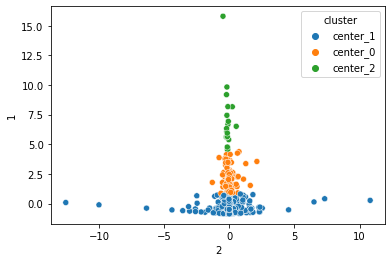

In [107]:
data = functions.get_data_from_2_2(1000)
data_clustered_adv = functions.our_k_means_adv(3, data, ['0', '1', '2'], max_iterations=10) # i.e. k_means_++
sns.scatterplot(data=data_clustered_adv, x='2', y='1', hue='cluster')    

<Axes: xlabel='2', ylabel='1'>

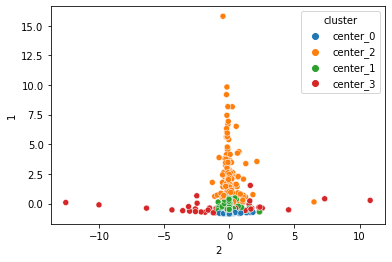

In [99]:
data_clustered_standard = functions.our_k_means_standard(4, data, ['0', '1', '2'], max_iterations=2) 
sns.scatterplot(data=data_clustered_standard, x='2', y='1', hue='cluster')

### q.2.3.2

The two most common methods for choosing the number of clusters in a clustering problem are : The elbow method and the silhouette score method. There are others but these are the most commonly used ones (and they have the advantage of being easier to implement and more easily interpretable). Due to the nature of our code, we'll implement the whole elbow method from scratch.

[0    293.274655
dtype: float64, 0    293.274655
dtype: float64, 0    214.500003
dtype: float64, 0    67.968523
dtype: float64, 0    43.025467
dtype: float64, 0    49.577078
dtype: float64, 0    59.276178
dtype: float64, 0    63.250799
dtype: float64]


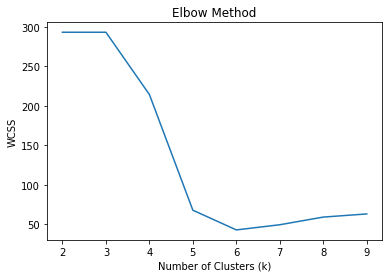

In [4]:
def elbow_method(k_range, n_iter):
    """
    This takes the range of cluster values we want to experiment with and plot
    the WCSS (total sum of squares for points relative to their center in each cluster)
    The elbow method consists of choosing the number of cluster where the curve
    shows an "elbow".
    """
    wcss_values = []
    # We unpack the value of the interval we chose ((2,10) for our example) for our loop
    for n_clusters in range(*k_range):
        data_clustered_standard_elb = functions.our_k_means_standard(n_clusters, data, ['0', '1', '2'], max_iterations=n_iter)
        wcss = functions.compute_wcss(n_clusters, data_clustered_standard_elb, ['0', '1', '2'])
        wcss_values.append(wcss)
        
    print(wcss_values)
    plt.plot(range(*k_range), wcss_values)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()

elbow_method((2,10), 7)

When we look at the curve, we can see that for $k = 3$, the curve shows an elbow. Hence, when strictly looking at this, we could say that $k_{opt} = 3$. However, we have to consider that due to computational issues, we can't (yet) do this for the whole dataset for a large number of iterations, we can't be 100% sure of this result then.

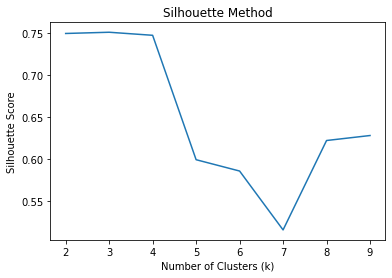

In [5]:
def silhouette_method(data, essential_cols, k_range, n_iter):
    """
    This function computes the silhouette score for the k-means++ implementation for every value of k we
    choose in an interval, this then plots out the curve of each silhouette score.
    """
    silhouette_avg_scores = []
    for n_clusters in range(*k_range):
        data_clustered_standard_sil = functions.our_k_means_adv(n_clusters, data, ['0', '1', '2'], max_iterations=n_iter)
        score = silhouette_score(data[essential_cols], data_clustered_standard_sil['cluster'])
        silhouette_avg_scores.append(score)
    
    plt.plot(range(*k_range), silhouette_avg_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()
    
silhouette_method(data, ['0', '1', '2'], (2,10), 10)

Using this method, we could say that 3 seems to be an optimal number of clusters, however, we can see that 5 has also a good average silhouette score and that it presented a slight elbow using the elbow method. As 3 is quite low and may not be suitable for a complex problem like this, one should also consider using larger values.

### q.2.3.5

In this question, I asked ChatGPT to provide me with another clustering algorithm. It wanted to implement DBSCAN first but I kept this implementation for the bonus question. On the second try, the LLM provided me with an implementation of a hierarchical clustering algorithm. This type of clustering algorithm is especially useful to get information on the structure of the data.
The LLM used the Agglomerative clustering algorithm specifically.

<Axes: xlabel='2', ylabel='1'>

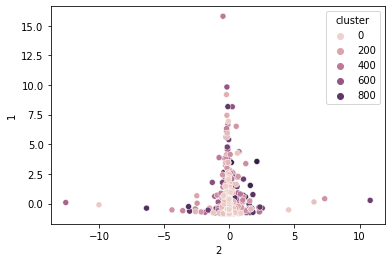

In [23]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = functions.get_data_from_2_2(1000)

# Using Agglomerative Clustering and initially fitting the model without specifying the number of clusters
ac = AgglomerativeClustering(metric='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
clusters = ac.fit_predict(data)
data['cluster'] = clusters

sns.scatterplot(data, x='2', y='1', hue='cluster')

The main difference between this and the K-means is that we don't provide the number of clusters, the algorithm figures it out automatically (the algorithm also seems to output a probability of a point being inside a cluster with the hue). However, because of that, there are a lot more parameters to give. I didn't change the parameters ChatGPT gave me and this gave me this result with 5 different cluster colors (which seems to be consistent with what we had earlier, 5 was also a good choice). I think K-Means is a little bit limited in this day and age and the kind of algorithm I used here can have other uses.

### q.2.4.1

I think the most important variable are related to watch time, so I choose average_click_duration and average_duration_per_day. These variable are somewhat correlated but we only examine them indepently here.

### q.2.4.2

Creating categories is easy for categorical values but much harder for numerical values. To be meaningful, categories must capture an approximately equal part of the data (so we can't just divide the max number of one column into 4 equal pieces). 

In [42]:
data_orig = pd.read_csv("user.csv")
_, categories = pd.qcut(data_orig['average_click_duration'], [0.25,0.5,0.75,1], labels=False, retbins = True)
print("The bin edges of the data for the column average_click_duration are :", *categories)

The bin edges of the data for the column average_click_duration are : 0.0 3432.4 27341.7 11471935.0


What we can see also is that the 25th percentile (0) is equal to the minimum value of the dataset. We can then choose the first category as "average_click_duration = 0" and the other as the remaining intervals.

We do the same thing with our other variable (average_duration_per_day)

In [43]:
data_orig = pd.read_csv("user.csv")
_, categories = pd.qcut(data_orig['average_duration_per_day'], [0.25,0.5,0.75,1], labels=False, retbins = True)
print("The bin edges of the data for the column average_duration_per_day are :", *categories)

The bin edges of the data for the column average_duration_per_day are : 0.0 5400.0 41902.225000000006 14007524.0


### q.2.4.3

Now that we have the categories, we can create the pivot tables. We choose 3 as the optimal number of clusters, as was previously mentioned.

In [108]:

# To ease our work later, we put the cluster values into the original dataframe
data_orig['cluster'] = data_clustered_adv['cluster']

# Bin edges 
bin_edges = [0.0, 0.00001, 3432.4, 27341.7, 11471935.0]

# Categorizing data into bins (we need it for the pivot table)
data_orig['click_duration_category'] = pd.cut(data_orig['average_click_duration'], bins=bin_edges, include_lowest=True, labels=['0', '0-3432.4', '3432.4-27341.7', '27341.7-11471935'])

# Creating a pivot table
pivot_table = pd.pivot_table(data_orig, values='average_click_duration', index='cluster', columns='click_duration_category', aggfunc='count')
print(pivot_table)

click_duration_category    0  0-3432.4  3432.4-27341.7  27341.7-11471935
cluster                                                                 
center_0                   2        23              64                60
center_1                 277       189             166               199
center_2                   0         4              15                 1


In [109]:
# We do the same thing as earlier with the other variable (average_duration_per_day), the bin edges are not the same
bin_edges_day_duration = [0.0, 0.00001, 5400.0, 41902.225000000006, 14007524.0]

data_orig['average_duration_category'] = pd.cut(data_orig['average_duration_per_day'], bins=bin_edges_day_duration, include_lowest=True, labels=['0', '0-3432.4', '3432.4-27341.7', '27341.7-11471935'])

pivot_table_day_duration = pd.pivot_table(data_orig, values='average_duration_per_day', index='cluster', columns='average_duration_category', aggfunc='count')
print(pivot_table_day_duration)

average_duration_category    0  0-3432.4  3432.4-27341.7  27341.7-11471935
cluster                                                                   
center_0                     2        23              58                66
center_1                   277       186             176               192
center_2                     0         1              15                 4


### q.2.4.4



In [110]:
# We compute the pivot table with all the percentages for each row as values.
pivot_percentage_clicks = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
pivot_percentage_day = pivot_table_day_duration.div(pivot_table_day_duration.sum(axis=1),  axis=0) * 100

print(pivot_percentage_clicks)
print(pivot_percentage_day)

click_duration_category          0   0-3432.4  3432.4-27341.7  \
cluster                                                         
center_0                  1.342282  15.436242       42.953020   
center_1                 33.333333  22.743682       19.975933   
center_2                  0.000000  20.000000       75.000000   

click_duration_category  27341.7-11471935  
cluster                                    
center_0                        40.268456  
center_1                        23.947052  
center_2                         5.000000  
average_duration_category          0   0-3432.4  3432.4-27341.7  \
cluster                                                           
center_0                    1.342282  15.436242       38.926174   
center_1                   33.333333  22.382671       21.179302   
center_2                    0.000000   5.000000       75.000000   

average_duration_category  27341.7-11471935  
cluster                                      
center_0                  

### q.2.4.5

What we have to say first is that cluster_2 here for example has much less value than cluster_0, this may be fine with the data we have (it doesn't necessarily equate to overfitting/underfitting) but with 3 dimensions like this, it's hard to say if the values we have are correct (and just comparing it to the python implementation of the algorithms is tricky as two different entirely clustering results can be "good" depending on the data).

However, from the percentage pivot table, we can easily see that the two variable present some similarities. We can also see that cluster_0 has very high values for both variables while cluster_1 has a bigger amount of 0s (higher than the total amount in the dataset which is close to 25%). Once again, it's hard to interpret center_2 but we can see that it has the highest proportion of high values, this may be a type of people who have a certain type of movie consumption.

### q.2.4.6

There are a number of metrics used to evaluate a clustering model. They can be based on labels or not (like here).
Here I use 2 that have different interpretations.


In [106]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

essential_cols = ['0', '1', '2']
silhouette_avg = silhouette_score(data[essential_cols], data_clustered_adv['cluster'])
davies_bouldin = davies_bouldin_score(data[essential_cols], data_clustered_adv['cluster'])

print(silhouette_avg)
print(davies_bouldin)

0.5966456709193908
0.9909035625133744


The two results can be interpreted differently. The silhouette score spans from -1 to 1, a silhouette score of 1 means that all objects are perfectly similar to other objects in their cluster and entirely different from other objects in other clusters. A score of 0.6 like here is considered pretty good because it means that the clusters separate the inputs well. However, depending on the problem, this could also be a sign of overfitting (if the silhouette score is too high).

The other metric is the davies boulding score, it ranges from 0 to infinity. A low davies bouldin is considered good (but it depends on the range of the values of the input) and indicates good separation.

Once again, as these metrics are unsupervised only, their interpretation remains complicated and may necessitate expert knowledge on the subject matter to get deeper into the analysis.

### BONUS

Once I asked ChatGPT for this kind of algorithm, he gave me the name of DBSCAN, one of its implementation is available from sklearn. 
What you have to keep in mind is that we don't input the number of clusters we want as parameters, instead we ajust the eps and min_samples values depending on the dataset to find a result with the number of clusters found automatically. From what I gathered online, the eps value can be obtained through the elbow method and empirical evidence shows that min_samples can be choses as dimension + 1 if the dimension value is low.

0        0
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: cluster, Length: 15000, dtype: int64


<Axes: xlabel='2', ylabel='1'>

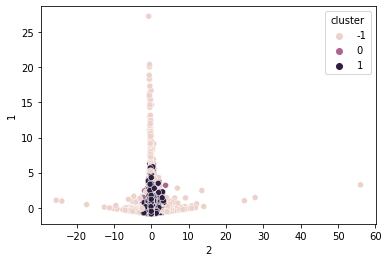

In [126]:
from sklearn.cluster import DBSCAN
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# The implementation in sklearn is very optimised so we can choose a large amount of inputs.
data = functions.get_data_from_2_2(15000)

dbscan = DBSCAN(eps=5, min_samples=4)
clusters = dbscan.fit_predict(data)

data['cluster'] = clusters

sns.scatterplot(data, x='2', y='1', hue='cluster')


If we plot the same plot as before, we can see that the algorithm chooses 3 as the optimal number of clusters automatically, this seems to be in line with what we had before. Keep in mind that this depends on the choice of the hyperparameters of the model so this may not be the "optimal" number of parameters in the sense if kmeans (but it will be for every choice of hypermater which represent a different interpretation of the data)